In [1]:
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner import Plot
from RoutePlanner.Optimisation import TravelTime

import numpy as np
import pandas as pd

=== Processing Waypoint = WP1 ===
=== Processing Waypoint = WP2 ===


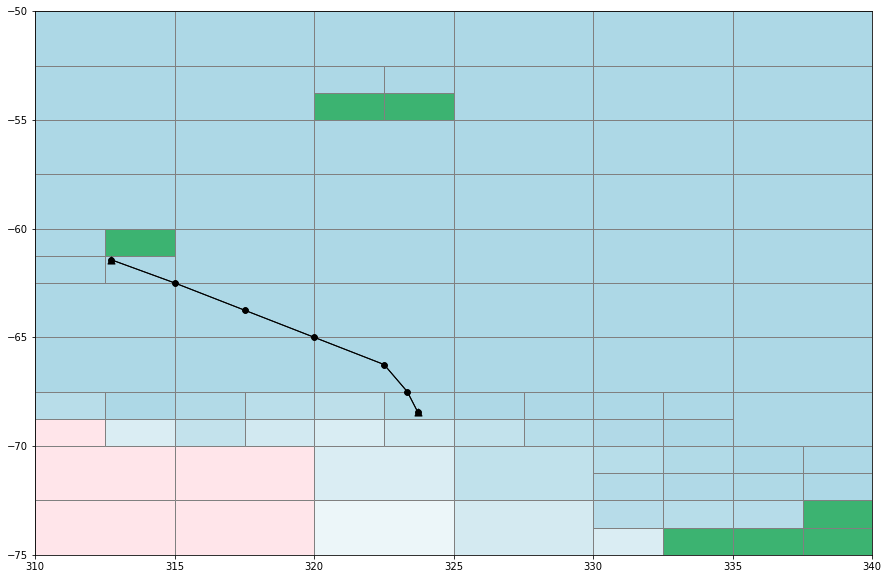

In [6]:
X     = [310,340]
Y     = [-75,-50]
d     = [5,2.5]

WP = pd.DataFrame({'Name':['WP1','WP2'],\
                   'Lat':np.random.uniform(low=Y[0], high=Y[1],size=2),\
                   'Long':np.random.uniform(low=X[0], high=X[1],size=2)})


icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc','2017-03-15','2017-03-16')
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')
cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(1)

#Plot.MeshNeighbours(cellGrid,np.random.uniform(low=X[0], high=X[1],size=1),np.random.uniform(low=Y[0], high=Y[1],size=1))


OptInfo = {}
OptInfo['WayPoints']            = WP
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'

OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(verbrose=True)
Plot.Paths(cellGrid,Paths,routepoints=True,Waypoints=WP)

 PATH: WP1 -> WP2 
 PATH: WP2 -> WP1 


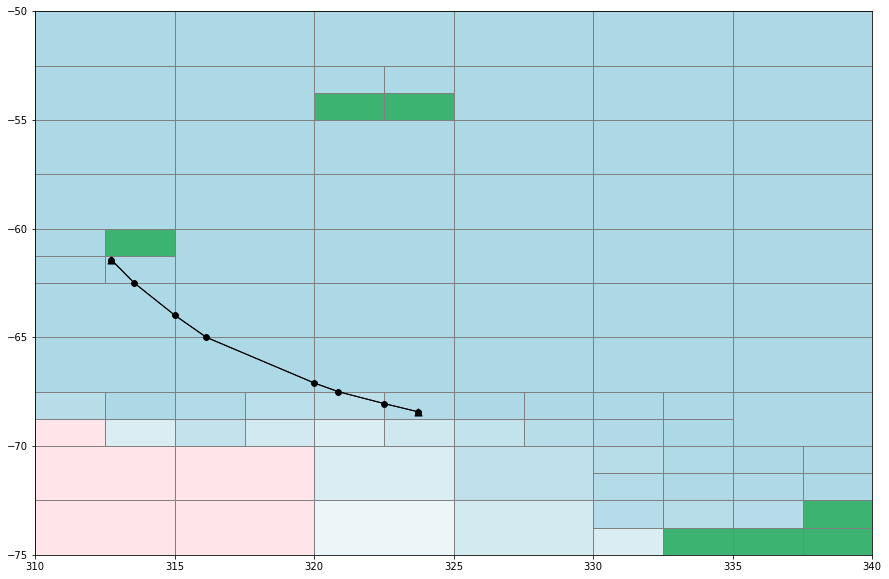

In [7]:
SmoothedPaths = TT.PathSmoothing(Paths,maxiter=100)
Plot.Paths(cellGrid,SmoothedPaths,routepoints=True,Waypoints=WP)

(-63.0, -62.0)

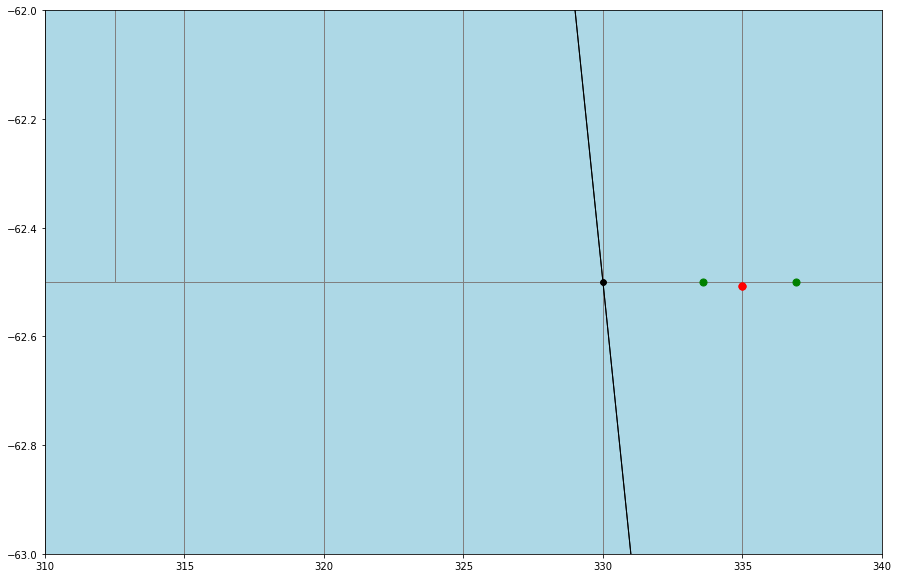

In [4]:
ax = Plot.Paths(cellGrid,Paths,routepoints=True,Waypoints=WP,return_ax=True)
cp1=(328.1848403191267, -60.0)
cp2=(331.51817365246006, -60.0)
Sp=(335.0,-62.50785400762682);crp=(333.5746378743731,-62.5);Cp=(335.7239136231197,-60.0)
ax.scatter(Sp[0],Sp[1],50,'r')
ax.scatter(crp[0],crp[1],50,'g')
ax.scatter(Cp[0],Cp[1],50,'b')

Sp=(335.0,-62.50785400762682);crp=(336.90797120770645,-62.5);Cp=(335.7239136231197,-60.0)
ax.scatter(Sp[0],Sp[1],50,'r')
ax.scatter(crp[0],crp[1],50,'g')
ax.scatter(Cp[0],Cp[1],50,'b')

ax.set_ylim([-63,-62])
